In [1]:
# Import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pemahaman Dataset

In [2]:
# load data
food = pd.read_csv('/content/Food_Delivery_Times.csv')
food.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [3]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [4]:
food.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [5]:
# cek missing value
food.isna().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


In [6]:
# Fill categorical columns with mode
for col in ['Weather', 'Traffic_Level', 'Time_of_Day']:
    food[col] = food[col].fillna(food[col].mode()[0])

# Fill numerical column with median
food['Courier_Experience_yrs'] = food['Courier_Experience_yrs'].fillna(food['Courier_Experience_yrs'].median())

In [7]:
# setelah di handle dengan median, sudah tidak ada missing value
food.isna().sum()

,0
Order_ID,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Time_min,0


In [8]:
# cek duplikasi data
len(food.drop_duplicates())

1000

In [9]:
len(food)

1000

In [10]:
# tidak ada duplikasi data
len(food.drop_duplicates()) / len(food)

1.0

Tidak ada duplikat

Penjelasan kolom yang ada :

- Order_ID = Nomor unik untuk setiap pesanan makanan

- Distance_km = Jarak antara restoran dan pelanggan dalam satuan kilometer. Semakin jauh jarak, biasanya waktu pengiriman lebih lama.

- Weather = Kondisi cuaca saat pengiriman, misalnya: Sunny, Rainy, Cloudy, Stormy, dll. Cuaca dapat memengaruhi waktu pengiriman.

- Traffic_Level = Tingkat kepadatan lalu lintas, misalnya: Low, Medium, High. Lalu lintas padat biasanya memperlambat kurir.

- Time_of_Day = Waktu dalam sehari saat pesanan dikirim, seperti Morning, Afternoon, Evening, Night. Bisa berpengaruh terhadap lalu lintas dan waktu pengiriman.

- Vehicle_Type = Jenis kendaraan yang digunakan oleh kurir,

- Preparation_Time_min = Waktu yang dibutuhkan restoran untuk menyiapkan makanan (dalam menit). Semakin lama waktu ini, semakin lama pula total waktu pengiriman.

- Courier_Experience_yrs = Lama pengalaman kurir dalam tahun. Kurir yang lebih berpengalaman biasanya bisa mengirim lebih efisien.

- Delivery_Time_min = Target/Output — total waktu pengiriman dari pemesanan hingga sampai ke pelanggan (dalam menit). Ini biasanya variabel yang ingin diprediksi.

# EDA

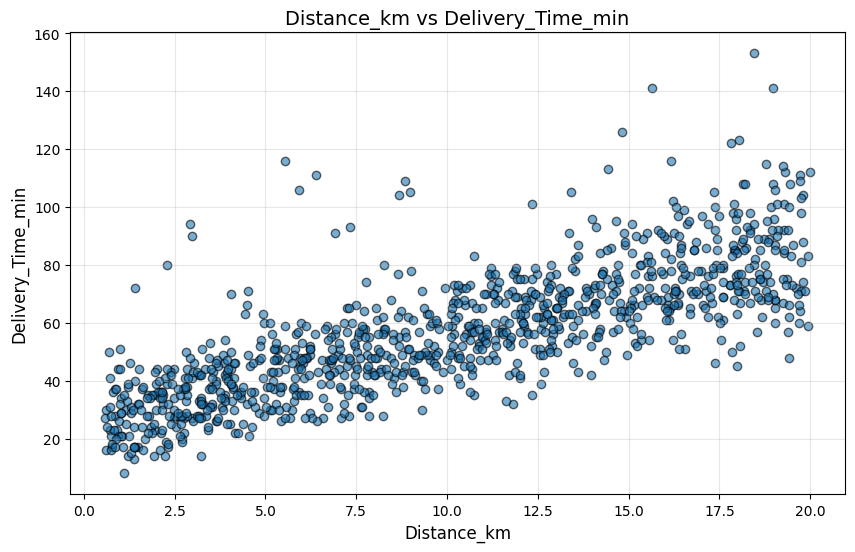

In [11]:
# melihat persebaran data distance_km dengan delivery time min
plt.figure(figsize=(10, 6))
plt.scatter(food["Distance_km"], food["Delivery_Time_min"], alpha=0.6, edgecolor='k')
plt.title("Distance_km vs Delivery_Time_min", fontsize=14)
plt.xlabel("Distance_km", fontsize=12)
plt.ylabel("Delivery_Time_min", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

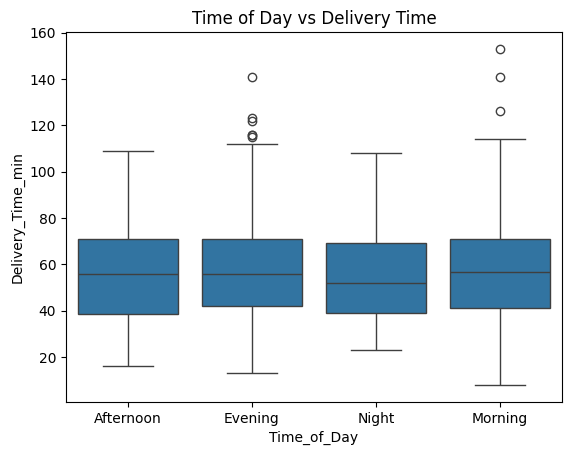

In [12]:
# melihat persebaran data time of day dengan delivery time
sns.boxplot(x='Time_of_Day', y='Delivery_Time_min', data=food)
plt.title('Time of Day vs Delivery Time')
plt.show()

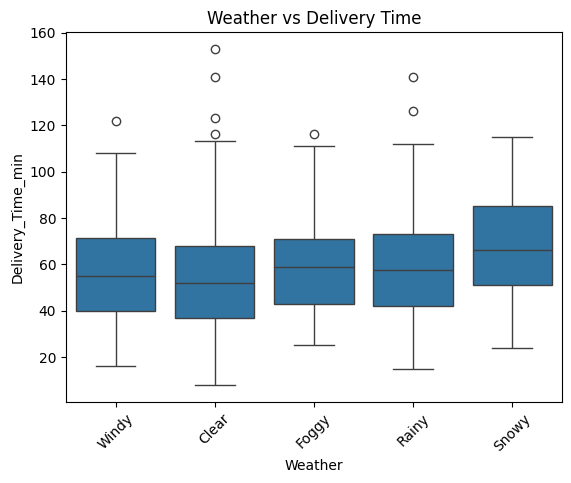

In [13]:
# melihat persebaran data weather dengan dilvery time
sns.boxplot(x='Weather', y='Delivery_Time_min', data=food)
plt.title('Weather vs Delivery Time')
plt.xticks(rotation=45)
plt.show()

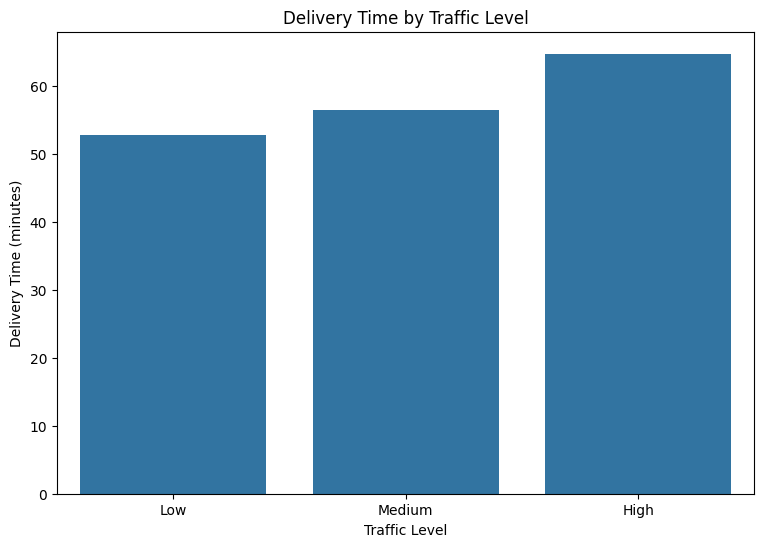

In [14]:
# melihat persebaran data avergae delivery time berdasarkan traffic level
plt.figure(figsize=(9, 6))
sns.barplot(x='Traffic_Level', y='Delivery_Time_min', data=food, errorbar=None)
plt.title("Delivery Time by Traffic Level")
plt.xlabel("Traffic Level")
plt.ylabel("Delivery Time (minutes)")
plt.show()

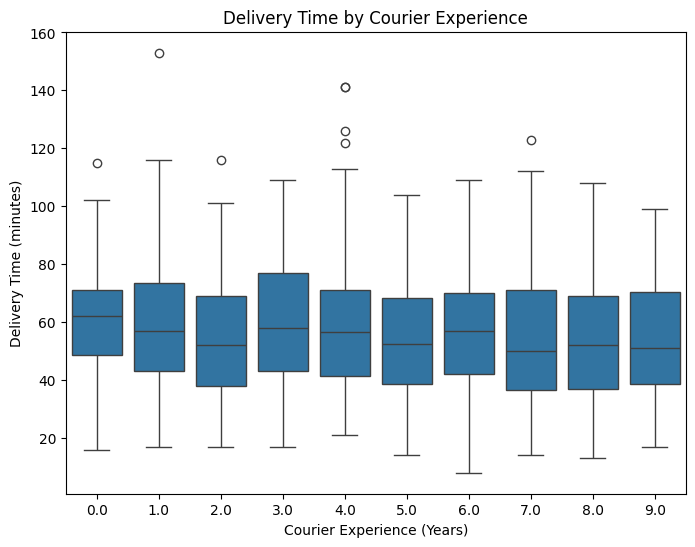

In [ ]:
# melihat persebaran data deliver timde dengan courier experince
plt.figure(figsize=(8, 6))
sns.boxplot(x='Courier_Experience_yrs', y='Delivery_Time_min', data=food)
plt.title("Delivery Time by Courier Experience")
plt.xlabel("Courier Experience (Years)")
plt.ylabel("Delivery Time (minutes)")
plt.show()

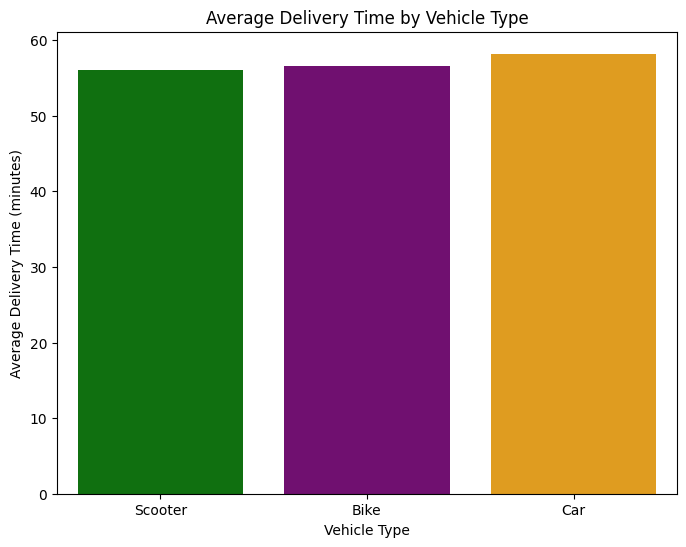

In [ ]:
# melihat persebaran data average delivery time berdasarkan vehicle type
plt.figure(figsize=(8, 6))
sns.barplot(x='Vehicle_Type', y='Delivery_Time_min', data=food, errorbar=None, hue='Vehicle_Type', palette = {'Scooter': "green", 'Bike': "purple", 'Car': 'orange'})
plt.title("Average Delivery Time by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Average Delivery Time (minutes)")
plt.show()

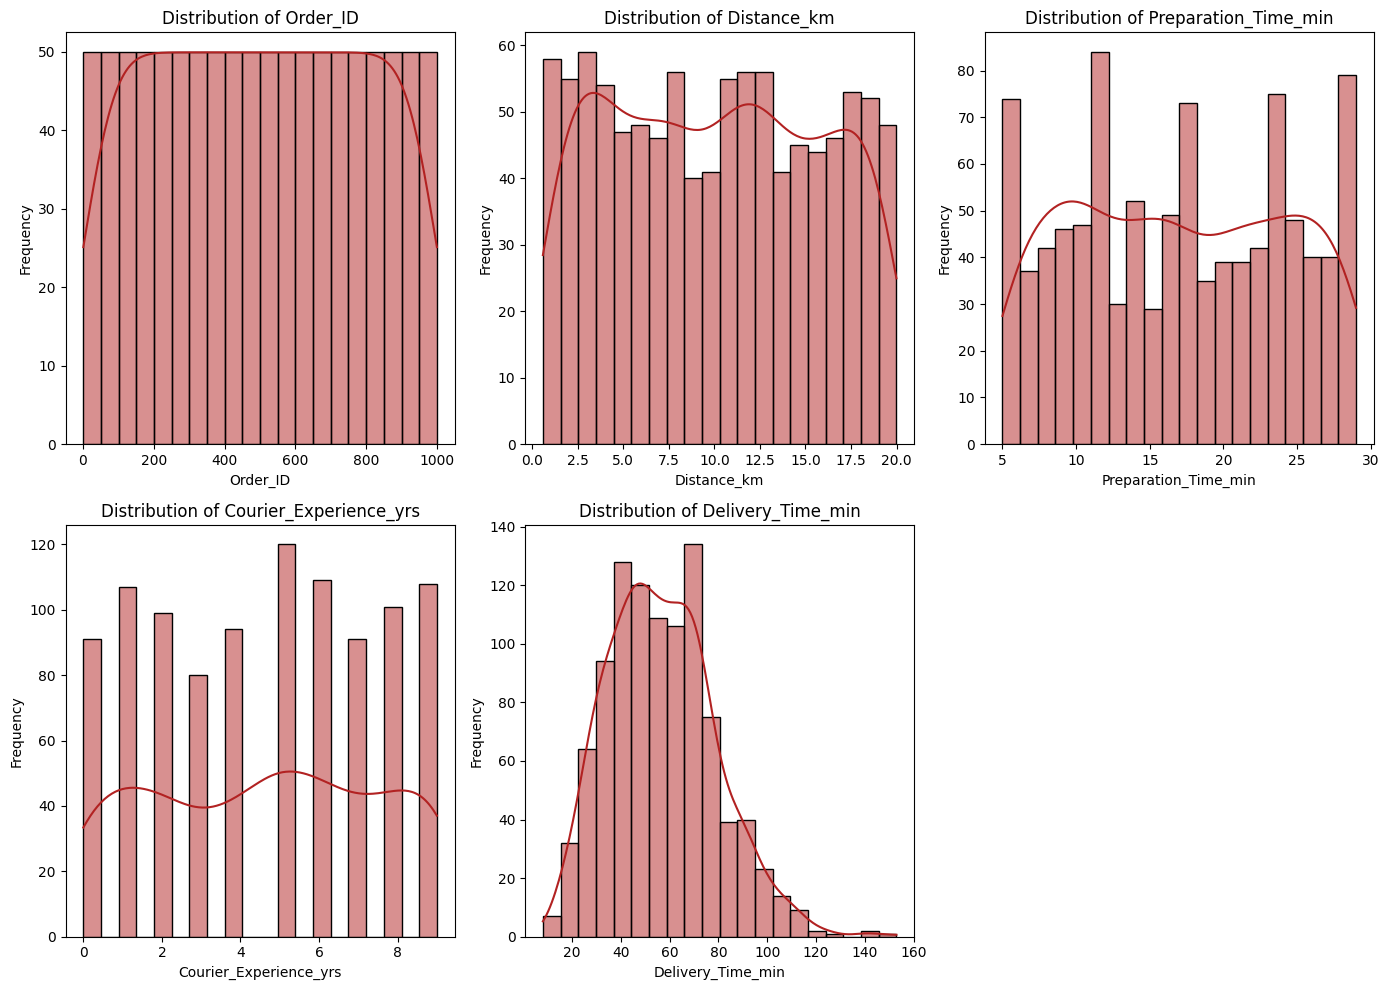

In [ ]:
# melihat distribusi dengan data numeric
numeric_cols = food.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)
    sns.histplot(food[col], kde=True, bins=20, color='firebrick')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
cat_cols = food.select_dtypes(include='object').columns
num_cols = food.select_dtypes(include=['int64','float64']).columns

In [ ]:
# melihat korelasi dengan target delivery time min
corr_target = food.corr(numeric_only=True)['Delivery_Time_min'].sort_values(ascending=False)

print("📊 Korelasi setiap fitur terhadap Target:\n")
print(corr_target)

📊 Korelasi setiap fitur terhadap Target:

Delivery_Time_min         1.000000
Distance_km               0.780998
Preparation_Time_min      0.307350
Order_ID                 -0.036650
Courier_Experience_yrs   -0.089111
Name: Delivery_Time_min, dtype: float64


# Split Data

In [ ]:
# split dataset
from sklearn.model_selection import train_test_split

X = food.drop(columns=['Order_ID','Delivery_Time_min'])
y = food['Delivery_Time_min']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=21)

In [ ]:
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=21)

In [ ]:
print("Train:", X_train.shape)
#print("Validation:", X_val.shape)
print("Test:", X_test.shape)

Train: (700, 7)
Test: (300, 7)


In [ ]:
#ubah dari numpy ke dataframe
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# untuk ambil kolom numerik
num_train = X_train.select_dtypes(include=['int64', 'float64'])

In [ ]:
# melihat korelasi vif score
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(num_train)

vif_food = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_food.columns = ['feature','vif_score']
vif_food = vif_food.loc[vif_food.feature!='const']
vif_food

,feature,vif_score
1,Distance_km,1.001229
2,Preparation_Time_min,1.001339
3,Courier_Experience_yrs,1.000628


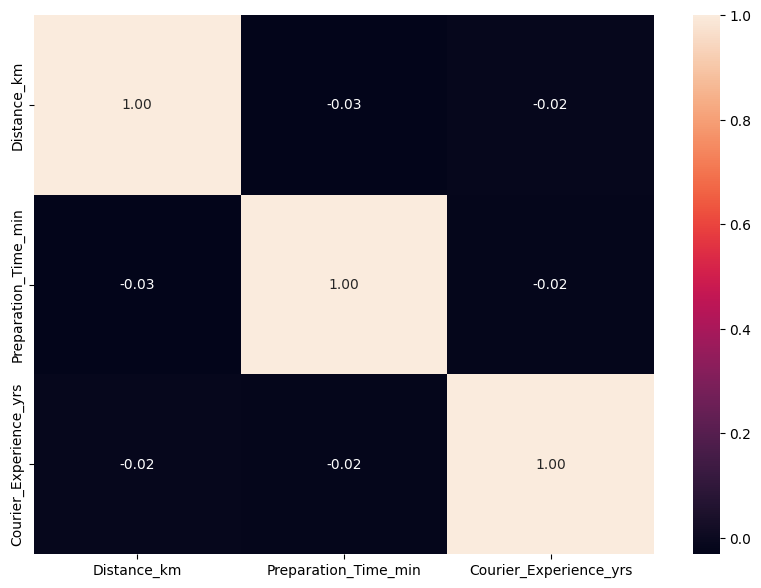

In [ ]:
# heatmap correlation
import matplotlib.pyplot as plt
import seaborn as sns
churn_train = pd.concat([X_train, y_train], axis=1)
corr = num_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [ ]:
X = add_constant(num_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,Distance_km,1.001229
2,Preparation_Time_min,1.001339
3,Courier_Experience_yrs,1.000628


## hanya untuk melihat corelasi dengan target delivery time min

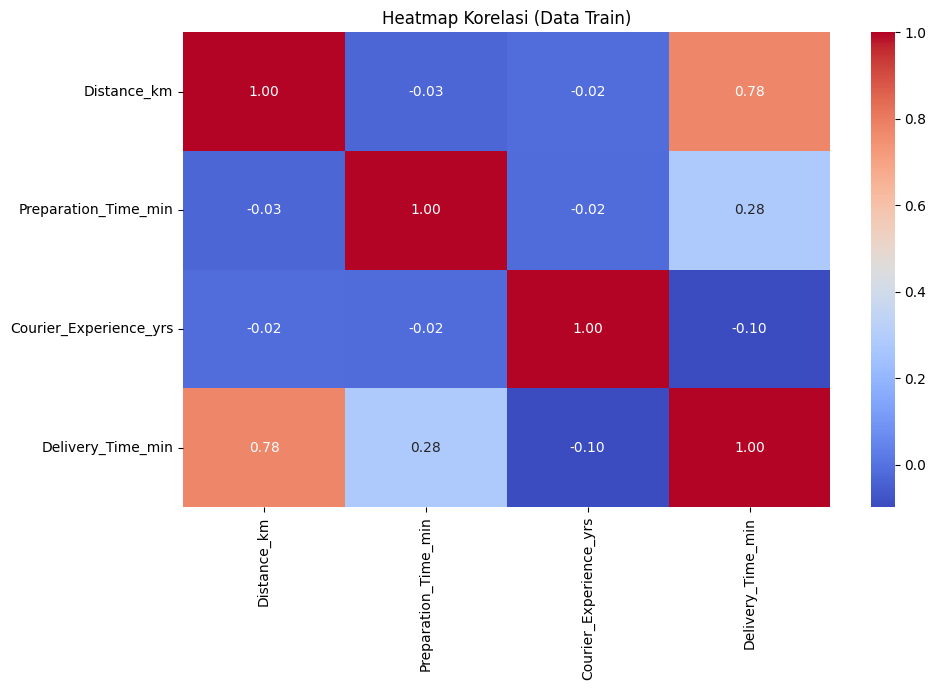

In [ ]:
# # Gabungkan fitur dan target
# train_df = pd.concat([X_train, y_train], axis=1)

# # Ambil hanya kolom numerik
# num_train = train_df.select_dtypes(include=['number'])

# # Hitung korelasi
# corr_train = num_train.corr()

# # Visualisasi heatmap
# plt.figure(figsize=(18, 7))

# plt.subplot(1, 2, 1)
# sns.heatmap(corr_train, annot=True, fmt=".2f", cmap="coolwarm")
# plt.title("Heatmap Korelasi (Data Train)")

# plt.tight_layout()
# plt.show()

note : kalau dijalankan heatmap untuk melihat korelasi delivery time min, maka harus dijalankan ulang tanpa menjalankan heatmap korelasi dengan delivery time min. karea datanya sudah di concat

# Data Preprocessing

In [ ]:
cat_cols = X_train.select_dtypes(include='object').columns
num_cols = num_train.select_dtypes(include=['int64','float64']).columns

X_train_cat = X_train[cat_cols]
X_train_num = X_train[num_cols]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat_enc = encoder.fit_transform(X_train_cat)

# pakai one hot encoding
X_train_cat_enc = pd.DataFrame(
    X_train_cat_enc,
    columns=encoder.get_feature_names_out(cat_cols),
    index=X_train.index
)

In [ ]:
# untuk menggabungkan data numerical dan categorical train tadi
X_train_final = pd.concat([X_train_num, X_train_cat_enc], axis=1)

In [ ]:
X_train_final.head()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_High,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter
828,7.75,21,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
204,18.34,9,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
505,2.11,28,5.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
101,17.20,14,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
667,10.42,28,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# untuk one hot encoding di data test
X_test_cat = X_test[cat_cols]
X_test_num = X_test[num_cols]

X_test_cat_enc = encoder.transform(X_test_cat)
X_test_cat_enc = pd.DataFrame(
    X_test_cat_enc,
    columns=encoder.get_feature_names_out(cat_cols),
    index=X_test.index
)

X_test_final = pd.concat([X_test_num, X_test_cat_enc], axis=1)

In [ ]:
# untuk one hot encoding di data validation
# kode ini tidak perlu dijalankan, karena saya tidak pakai validation
X_val_cat = X_test[cat_cols]
X_val_num = X_test[num_cols]

X_val_cat_enc = encoder.transform(X_test_cat)
X_val_cat_enc = pd.DataFrame(
    X_val_cat_enc,
    columns=encoder.get_feature_names_out(cat_cols),
    index=X_test.index
)

X_test_final = pd.concat([X_val_num, X_val_cat_enc], axis=1)

In [ ]:
# min-max scaler based on training data
# agar datanya di normalisasikan
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

minmax_scaler = scaler.fit(X_train_final)
X_train_final = minmax_scaler.transform(X_train_final)
X_test_final = minmax_scaler.transform(X_test_final)

# Modeling

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Linear regresion

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, make_scorer
import numpy as np

#model untuk test
# Buat model
lr = LinearRegression()

# Skema cross-validation (5-fold)
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Gunakan MAE sebagai metrik evaluasi
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Jalankan cross-validation pada data training final
cv_scores = cross_val_score(
    lr,
    X_train_final,
    y_train,
    cv=cv,
    scoring=mae_scorer,
    n_jobs=-1
)

# Tampilkan hasil cross-validation
print("Cross-Validation MAE per fold:", -cv_scores)
print("Rata-rata MAE (5-fold):", -np.mean(cv_scores))

# Latih ulang model pada seluruh data training final
lr.fit(X_train_final, y_train)

# Prediksi di data test final
y_pred_lr = lr.predict(X_test_final)

r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"R² Score : {r2_lr:.4f}")
print(f"MAE      : {mae_lr:,.2f}")
print(f"RMSE     : {rmse_lr:,.2f}")

Cross-Validation MAE per fold: [7.00105221 7.16162685 6.35570046]
Rata-rata MAE (5-fold): 6.83945984231639
R² Score : 0.7898
MAE      : 6.49
RMSE     : 9.94


In [ ]:
# Train
lr = LinearRegression()

# Skema cross-validation (5-fold)
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Gunakan MAE sebagai metrik evaluasi
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Jalankan cross-validation pada data training final
cv_scores = cross_val_score(
    lr,
    X_train_final,
    y_train,
    cv=cv,
    scoring=mae_scorer,
    n_jobs=-1
)

# Tampilkan hasil cross-validation
print("Cross-Validation MAE per fold:", -cv_scores)
print("Rata-rata MAE (5-fold):", -np.mean(cv_scores))

# Latih ulang model pada seluruh data training final
lr.fit(X_train_final, y_train)

# Prediksi di data test final
y_pred_lr = lr.predict(X_train_final)

r2_lr_t = r2_score(y_train, y_pred_lr)
mae_lr_t = mean_absolute_error(y_train, y_pred_lr)
rmse_lr_t = np.sqrt(mean_squared_error(y_train, y_pred_lr))

print(f"R² Score : {r2_lr_t:.4f}")
print(f"MAE      : {mae_lr_t:,.2f}")
print(f"RMSE     : {rmse_lr_t:,.2f}")



Cross-Validation MAE per fold: [7.00105221 7.16162685 6.35570046]
Rata-rata MAE (5-fold): 6.83945984231639
R² Score : 0.7668
MAE      : 6.56
RMSE     : 10.73


### Ridge dan Lasso

In [ ]:
# === LASSO REGRESSION ===
lasso = Lasso(alpha=0.1, random_state=42, max_iter=10000)

cv_scores_lasso = cross_val_score(
    lasso,
    X_train_final,
    y_train,
    cv=cv,
    scoring=mae_scorer,
    n_jobs=-1
)

print("\nLasso Regression - Cross-Validation MAE per fold:", -cv_scores_lasso)
print("Lasso Regression - Rata-rata MAE:", -np.mean(cv_scores_lasso))

# Latih ulang model pada seluruh data training final
lasso.fit(X_train_final, y_train)

# Prediksi di data test final
y_pred_lasso = lasso.predict(X_test_final)

r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print("Lasso Regression Test Results")
print(f"R² Score : {r2_lasso:.4f}")
print(f"MAE      : {mae_lasso:,.2f}")
print(f"RMSE     : {rmse_lasso:,.2f}")


Lasso Regression - Cross-Validation MAE per fold: [6.98814805 7.08578978 6.36253358]
Lasso Regression - Rata-rata MAE: 6.81215713579905
Lasso Regression Test Results
R² Score : 0.7948
MAE      : 6.30
RMSE     : 9.82


In [ ]:
lasso = Lasso(alpha=0.1, random_state=42, max_iter=10000)

cv_scores_lasso = cross_val_score(
    lasso,
    X_train_final,
    y_train,
    cv=cv,
    scoring=mae_scorer,
    n_jobs=-1
)

print("\nLasso Regression - Cross-Validation MAE per fold:", -cv_scores_lasso)
print("Lasso Regression - Rata-rata MAE:", -np.mean(cv_scores_lasso))

# Latih ulang model pada seluruh data training final
lasso.fit(X_train_final, y_train)

# Prediksi di data test final
y_pred_lasso = lasso.predict(X_train_final)

r2_lasso = r2_score(y_train, y_pred_lasso)
mae_lasso = mean_absolute_error(y_train, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_train, y_pred_lasso))

print("Lasso Regression Train Results")
print(f"R² Score : {r2_lasso:.4f}")
print(f"MAE      : {mae_lasso:,.2f}")
print(f"RMSE     : {rmse_lasso:,.2f}")


Lasso Regression - Cross-Validation MAE per fold: [6.98814805 7.08578978 6.36253358]
Lasso Regression - Rata-rata MAE: 6.81215713579905
Lasso Regression Train Results
R² Score : 0.7658
MAE      : 6.56
RMSE     : 10.75


In [ ]:
from sklearn.linear_model import Ridge, Lasso
# === RIDGE REGRESSION ===
ridge = Ridge(alpha=1.0, random_state=42)  # alpha = regularization strength

cv = KFold(n_splits=3, shuffle=True, random_state=42)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

cv_scores_ridge = cross_val_score(
    ridge,
    X_train_final,
    y_train,
    cv=cv,
    scoring=mae_scorer,
    n_jobs=-1
)

print("Ridge Regression - Cross-Validation MAE per fold:", -cv_scores_ridge)
print("Ridge Regression - Rata-rata MAE:", -np.mean(cv_scores_ridge))

# Latih ulang model pada seluruh data training final
ridge.fit(X_train_final, y_train)

# Prediksi di data test final
y_pred_ridge = ridge.predict(X_test_final)

r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("\n=== Ridge Regression Test Results ===")
print(f"R² Score : {r2_ridge:.4f}")
print(f"MAE      : {mae_ridge:,.2f}")
print(f"RMSE     : {rmse_ridge:,.2f}")


Ridge Regression - Cross-Validation MAE per fold: [6.99951254 7.15467466 6.35096797]
Ridge Regression - Rata-rata MAE: 6.835051722966522

=== Ridge Regression Test Results ===
R² Score : 0.7901
MAE      : 6.48
RMSE     : 9.94


In [ ]:
ridge = Ridge(alpha=1.0, random_state=42)  # alpha = regularization strength

cv = KFold(n_splits=3, shuffle=True, random_state=42)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

cv_scores_ridge = cross_val_score(
    ridge,
    X_train_final,
    y_train,
    cv=cv,
    scoring=mae_scorer,
    n_jobs=-1
)

print("Ridge Regression - Cross-Validation MAE per fold:", -cv_scores_ridge)
print("Ridge Regression - Rata-rata MAE:", -np.mean(cv_scores_ridge))

# Latih ulang model pada seluruh data training final
ridge.fit(X_train_final, y_train)

# Prediksi di data test final
y_pred_ridge = ridge.predict(X_train_final)

r2_ridge = r2_score(y_train, y_pred_ridge)
mae_ridge = mean_absolute_error(y_train, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_train, y_pred_ridge))

print("Ridge Regression Train Results")
print(f"R² Score : {r2_ridge:.4f}")
print(f"MAE      : {mae_ridge:,.2f}")
print(f"RMSE     : {rmse_ridge:,.2f}")

Ridge Regression - Cross-Validation MAE per fold: [6.99951254 7.15467466 6.35096797]
Ridge Regression - Rata-rata MAE: 6.835051722966522
Ridge Regression Train Results
R² Score : 0.7668
MAE      : 6.55
RMSE     : 10.73


### mencari penjelasan kenapa data test lebih baik dari data train

In [ ]:
#berdasarkan mean
print("Train target mean:", y_train.mean())
print("Test target mean:", y_test.mean())

print("\nDistribusi fitur numerik:")
display(X_train_final.describe())
display(X_test_final.describe())

Train target mean: 56.965714285714284
Test target mean: 56.18666666666667

Distribusi fitur numerik:


,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_High,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,10.068429,17.174286,4.575714,0.510000,0.104286,0.198571,0.095714,0.091429,0.184286,0.400000,0.415714,0.282857,0.282857,0.347143,0.087143,0.494286,0.202857,0.302857
std,5.681205,7.178168,2.861362,0.500257,0.305849,0.399210,0.294409,0.288424,0.387994,0.490248,0.493197,0.450710,0.450710,0.476402,0.282246,0.500325,0.402415,0.459823
min,0.590000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.130000,11.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.120000,17.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.052500,23.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,19.990000,29.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_High,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,10.040233,16.533333,4.630000,0.476667,0.100000,0.216667,0.100000,0.106667,0.226667,0.343333,0.430000,0.286667,0.316667,0.316667,0.080000,0.523333,0.176667,0.300000
std,5.742024,7.257948,2.898466,0.500290,0.300501,0.412662,0.300501,0.309205,0.419375,0.475615,0.495903,0.452960,0.465953,0.465953,0.271746,0.500290,0.382024,0.459023
min,0.710000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.977500,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.380000,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,14.760000,23.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,19.860000,29.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# berdasarkan cross validation dan standar deviasi
print("CV MAE per fold:", -cv_scores)
print("Standar deviasi MAE:", np.std(-cv_scores))

CV MAE per fold: [7.00105221 7.16162685 6.35570046]
Standar deviasi MAE: 0.34829432671952837


In [ ]:
#untuk melihat coef model Linear Regression
pd.DataFrame(zip(X.columns, lr.coef_))

,0,1
0,const,3.021770
1,Distance_km,0.960281
2,Preparation_Time_min,-0.687169
3,Courier_Experience_yrs,-4.832362


Seletlah dilakukan pencarian mean yang hasilnya hampir sama, lalu standar deviasi yang jauh nilainya dari cross validation. Tidak ditemukan alasan kenapa model data test lebih baik dari model data train.

- Kemungkinan data yang di split di data test lebih mudah dari data train

- kemungkinan lain model linear regresion yang sederhana sehingga menyebabkan model underfit

## xgboost regressor

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Membuat model dasar
xgb_regressor = XGBRegressor(objective='reg:squarederror', eval_metric='mae')

# Parameter grid untuk tuning
param_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

# Grid Search dengan 5-fold cross-validation
grid_search_xgb = GridSearchCV(
    estimator=xgb_regressor,
    param_grid=param_xgb,
    cv=3,
    scoring='neg_mean_absolute_error',  # sesuai dengan eval_metric
    n_jobs=-1,  # gunakan semua core CPU
    verbose=1
)

# Latih model
grid_search_xgb.fit(X_train_final, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric='mae',
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=Non...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 5, 10],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
grid_search_xgb.best_params_

{'learning_rate': 0.2,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 50,
 'subsample': 0.8}

In [ ]:
best_gs_xgb_two = grid_search_xgb.best_estimator_

In [ ]:
# test xgb
y_test_pred1 = best_gs_xgb_two.predict(X_test_final)

r2_xgb = r2_score(y_test, y_test_pred1)
mae_xgb = mean_absolute_error(y_test, y_test_pred1)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred1))

print(f"R² Score : {r2_xgb:.4f}")
print(f"MAE      : {mae_xgb:,.2f}")
print(f"RMSE     : {rmse_xgb:,.2f}")

R² Score : 0.7673
MAE      : 6.92
RMSE     : 10.46


In [ ]:
#train xgb
y_test_pred1 = best_gs_xgb_two.predict(X_train_final)

r2_xgb_t = r2_score(y_train, y_test_pred1)
mae_xgb_t = mean_absolute_error(y_train, y_test_pred1)
rmse_xgb_t = np.sqrt(mean_squared_error(y_train, y_test_pred1))

print(f"R² Score : {r2_xgb_t:.4f}")
print(f"MAE      : {mae_xgb_t:,.2f}")
print(f"RMSE     : {rmse_xgb_t:,.2f}")

R² Score : 0.8488
MAE      : 5.56
RMSE     : 8.64


## Randomforest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Test Random Forest
param_grid = {
    'n_estimators': [200, 600],
    'max_depth': [None, 25, 50],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)

grid_rf = GridSearchCV(estimator=rf,
                       param_grid=param_grid,
                       cv=3,
                       scoring='neg_mean_absolute_error',
                       n_jobs=-1,
                       verbose=1)

grid_rf.fit(X_train_final, y_train)

# Best model
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_final)

r2_rf = r2_score(y_test, y_pred_best_rf)
mae_rf = mean_absolute_error(y_test, y_pred_best_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))

print(f"R² Score : {r2_rf:.4f}")
print(f"MAE      : {mae_rf:,.2f}")
print(f"RMSE     : {rmse_rf:,.2f}")


print("Best Params:", grid_rf.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
R² Score : 0.7652
MAE      : 7.02
RMSE     : 10.51
Best Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# Train Random Forest
param_grid = {
    'n_estimators': [200, 400],
    'max_depth': [None, 25, 50],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)

grid_rf = GridSearchCV(estimator=rf,
                       param_grid=param_grid,
                       cv=3,
                       scoring='neg_mean_absolute_error',
                       n_jobs=-1,
                       verbose=1)

grid_rf.fit(X_train_final, y_train)

# Best model
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_train_final)

r2_rf = r2_score(y_train, y_pred_best_rf)
mae_rf = mean_absolute_error(y_train, y_pred_best_rf)
rmse_rf = np.sqrt(mean_squared_error(y_train, y_pred_best_rf))

print(f"R² Score : {r2_rf:.4f}")
print(f"MAE      : {mae_rf:,.2f}")
print(f"RMSE     : {rmse_rf:,.2f}")


print("Best Params:", grid_rf.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
R² Score : 0.9103
MAE      : 4.09
RMSE     : 6.65
Best Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


Best model Linear Regresion
Pada model ini, didapatkan nilai :
- R2 score = 0.7898 bisa dibilang model berhasil atau mampu menangkap 78.98% atau 79% variansi dari fitur delivery time. artinya model bisa diaktakan baik digunakan untuk menghitung prediksi waktu delivery time.

- MAE atau rata-rata kesalahan prediksi model adalah sekitar 6.49 menit

- RMSE atau rata-rata deviasi harga adalah 9.94 menit dengan rata-rata harga rumah yaitu 56.73 menit dimana nilai RMSE lebih kecil dari nilai rata-rata yang artinya model memiliki kemampuan memprediksi waktu delivery time yang lebih realistis.

In [ ]:
# untuk mengetahui fitur mana paling berpengaruh
coef = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Coefficient': lr.coef_
})
coef.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
8,Traffic_Level_High,6.334264
6,Weather_Snowy,5.533776
0,Distance_km,3.021770
12,Time_of_Day_Evening,1.471502
5,Weather_Rainy,1.387236
4,Weather_Foggy,1.279962
1,Preparation_Time_min,0.960281
16,Vehicle_Type_Car,0.855048
15,Vehicle_Type_Bike,0.002045
10,Traffic_Level_Medium,-0.365897


# Feature Importance

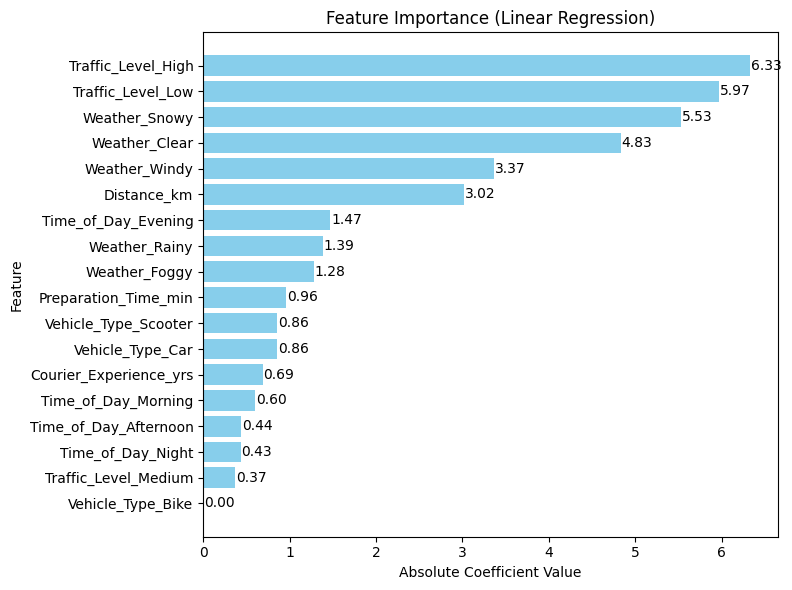

In [ ]:
# Buat feature importance dari linear regresion
importance = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Coefficient': lr.coef_,
    'Absolute_Importance': abs(lr.coef_)
}).sort_values(by='Absolute_Importance', ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(8,6))
bars = plt.barh(importance['Feature'], importance['Absolute_Importance'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Linear Regression)')

# Tambahkan nilai di samping bar
for bar in bars:
    plt.text(
        bar.get_width() + 0.01,                  # posisi x (sedikit di kanan bar)
        bar.get_y() + bar.get_height()/2,        # posisi y di tengah bar
        f"{bar.get_width():.2f}",                # tampilkan angka dengan 2 desimal
        va='center'
    )

plt.tight_layout()
plt.show()

Diketahui  fitur yang paling berpengaruh pada model adalah Traffic level, terutama traffic level high yang nilainya 6.33. setelah traffic diikuti oleh weather.

